In [1]:
from fastai.vision.all import *
from PIL import Image

In [2]:
print("loading train dataset")
path = Path('data/')
#path.ls()

loading train dataset


In [3]:
def is_obama(x): 
    return 'obama' in x

In [4]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, bs=2,
    label_func=is_obama, item_tfms=Resize(224))

In [5]:
print("training model")
learn = cnn_learner(dls, resnet34, metrics=error_rate)

learn.fit(4)

training model


epoch,train_loss,valid_loss,error_rate,time
0,0.868389,0.118140,0.000000,00:01
1,0.599824,0.045443,0.000000,00:01
2,0.455552,0.032220,0.000000,00:01
3,0.503781,0.006121,0.000000,00:01


In [6]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.299793,0.003721,0.000000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.709981,0.006079,0.000000,00:01


In [7]:
tst_image = "data/obama-1.jpg"

uploader = SimpleNamespace(data = [tst_image])
img = PILImage.create(uploader.data[0])

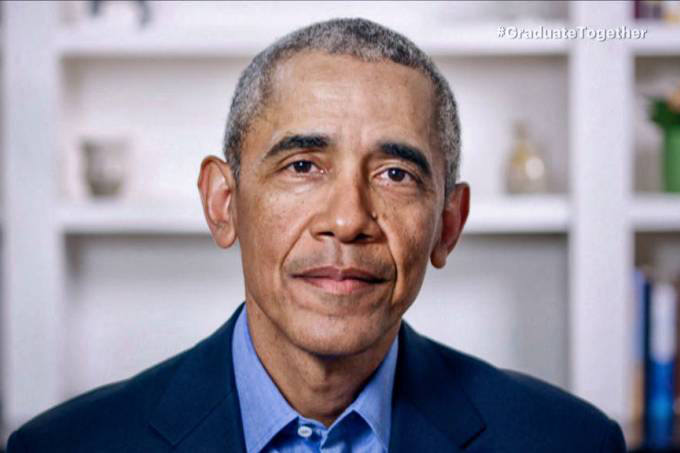

In [8]:
img

In [9]:
is_obama_,_,probs = learn.predict(img)

In [10]:
is_obama_

'True'

In [11]:
print("Testing image", tst_image)

Testing image data/obama-1.jpg


In [12]:
print(f"Probability it's obama: {probs[1].item():.6f}")

Probability it's obama: 0.999365


In [13]:
print("model exported to models/export.pkl")
path = Path('models/')
learn.path = path
learn.export()

model exported to models/export.pkl


In [14]:
#learn_inf = load_learner('data2/export.pkl')

In [15]:
#learn_inf.predict('data/obama-1.jpg')